<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.728327,41.637520,92.428552,93.923526,-3.183904,292.534022,292.861151,-0.327130
1,0.0,1.0,30.351352,85.683501,82.899089,20.227514,75.914414,305.075869,244.445550,60.630319
2,0.0,2.0,35.778001,55.880104,42.719332,79.146467,-3.227023,220.296880,217.864841,2.432039
3,0.0,3.0,53.147216,95.898995,88.802938,37.553218,0.254358,285.656725,301.783443,-16.126718
4,0.0,4.0,66.392438,61.163319,33.846309,84.155224,-18.097104,237.460185,248.033517,-10.573331
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.561347,62.422904,69.802088,83.221733,13.550991,282.559063,277.608237,4.950826
59996,999.0,56.0,29.242024,42.513439,56.437454,86.019106,-4.437232,219.774791,230.130743,-10.355951
59997,999.0,57.0,92.470015,93.626469,74.653078,68.414847,61.571616,400.736026,349.326093,51.409933
59998,999.0,58.0,36.984104,49.400336,39.054943,40.326239,-20.649034,155.116588,178.827429,-23.710840


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    57.728327  41.637520  92.428552  93.923526  -3.183904   
      1.0    30.351352  85.683501  82.899089  20.227514  75.914414   
      2.0    35.778001  55.880104  42.719332  79.146467  -3.227023   
      3.0    53.147216  95.898995  88.802938  37.553218   0.254358   
      4.0    66.392438  61.163319  33.846309  84.155224 -18.097104   
...                ...        ...        ...        ...        ...   
999.0 55.0   43.561347  62.422904  69.802088  83.221733  13.550991   
      56.0   29.242024  42.513439  56.437454  86.019106  -4.437232   
      57.0   92.470015  93.626469  74.653078  68.414847  61.571616   
      58.0   36.984104  49.400336  39.054943  40.326239 -20.649034   
      59.0   34.815171  74.001747  48.031346  31.757860  66.189158   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    292.534022  292.861151  -0.327130  
      1.0    305.075869  244.445550  60.630319  
      2.0    220.296880  217.864841   2.432039  
      3.0    285.656725  301.783443 -16.126718  
      4.0    237.460185  248.033517 -10.573331  
...                 ...         ...        ...  
999.0 55.0   282.559063  277.608237   4.950826  
      56.0   219.774791  230.130743 -10.355951  
      57.0   400.736026  349.326093  51.409933  
      58.0   155.116588  178.827429 -23.710840  
      59.0   264.795283  206.803934  57.991348  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    57.728327  41.637520  92.428552  93.923526  -3.183904   
      1.0    30.351352  85.683501  82.899089  20.227514  75.914414   
      2.0    35.778001  55.880104  42.719332  79.146467  -3.227023   
      3.0    53.147216  95.898995  88.802938  37.553218   0.254358   
      4.0    66.392438  61.163319  33.846309  84.155224 -18.097104   
...                ...        ...        ...        ...        ...   
999.0 55.0   43.561347  62.422904  69.802088  83.221733  13.550991   
      56.0   29.242024  42.513439  56.437454  86.019106  -4.437232   
      57.0   92.470015  93.626469  74.653078  68.414847  61.571616   
      58.0   36.984104  49.400336  39.054943  40.326239 -20.649034   
      59.0   34.815171  74.001747  48.031346  31.757860  66.189158   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    292.534022  292.861151  -0.327130  
      1.0    305.075869  244.445550  60.630319  
      2.0    220.296880  217.864841   2.432039  
      3.0    285.656725  301.783443 -16.126718  
      4.0    237.460185  248.033517 -10.573331  
...                 ...         ...        ...  
999.0 55.0   282.559063  277.608237   4.950826  
      56.0   219.774791  230.130743 -10.355951  
      57.0   400.736026  349.326093  51.409933  
      58.0   155.116588  178.827429 -23.710840  
      59.0   264.795283  206.803934  57.991348  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,57.728327,41.637520,92.428552,93.923526,-3.183904,292.534022,292.861151,-0.327130
1,0.0,1.0,30.351352,85.683501,82.899089,20.227514,75.914414,305.075869,244.445550,60.630319
2,0.0,2.0,35.778001,55.880104,42.719332,79.146467,-3.227023,220.296880,217.864841,2.432039
3,0.0,3.0,53.147216,95.898995,88.802938,37.553218,0.254358,285.656725,301.783443,-16.126718
4,0.0,4.0,66.392438,61.163319,33.846309,84.155224,-18.097104,237.460185,248.033517,-10.573331
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,43.561347,62.422904,69.802088,83.221733,13.550991,282.559063,277.608237,4.950826
59996,999.0,56.0,29.242024,42.513439,56.437454,86.019106,-4.437232,219.774791,230.130743,-10.355951
59997,999.0,57.0,92.470015,93.626469,74.653078,68.414847,61.571616,400.736026,349.326093,51.409933
59998,999.0,58.0,36.984104,49.400336,39.054943,40.326239,-20.649034,155.116588,178.827429,-23.710840


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    57.728327  41.637520  92.428552  93.923526  -3.183904   
      1.0    30.351352  85.683501  82.899089  20.227514  75.914414   
      2.0    35.778001  55.880104  42.719332  79.146467  -3.227023   
      3.0    53.147216  95.898995  88.802938  37.553218   0.254358   
      4.0    66.392438  61.163319  33.846309  84.155224 -18.097104   
...                ...        ...        ...        ...        ...   
999.0 55.0   43.561347  62.422904  69.802088  83.221733  13.550991   
      56.0   29.242024  42.513439  56.437454  86.019106  -4.437232   
      57.0   92.470015  93.626469  74.653078  68.414847  61.571616   
      58.0   36.984104  49.400336  39.054943  40.326239 -20.649034   
      59.0   34.815171  74.001747  48.031346  31.757860  66.189158   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    292.534022  292.861151  -0.327130  
      1.0    305.075869  244.445550  60.630319  
      2.0    220.296880  217.864841   2.432039  
      3.0    285.656725  301.783443 -16.126718  
      4.0    237.460185  248.033517 -10.573331  
...                 ...         ...        ...  
999.0 55.0   282.559063  277.608237   4.950826  
      56.0   219.774791  230.130743 -10.355951  
      57.0   400.736026  349.326093  51.409933  
      58.0   155.116588  178.827429 -23.710840  
      59.0   264.795283  206.803934  57.991348  

[60000 rows x 8 columns]

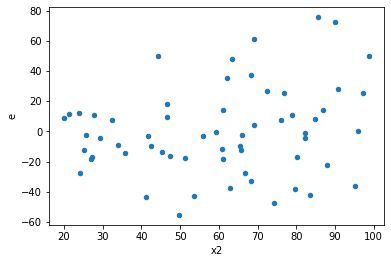

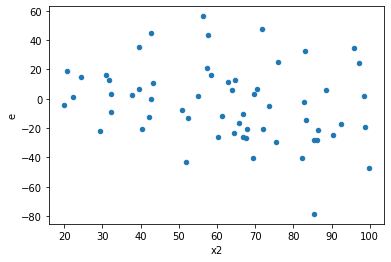

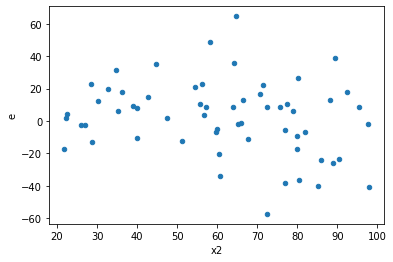

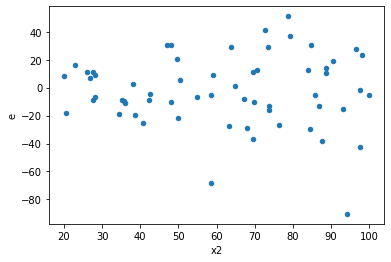

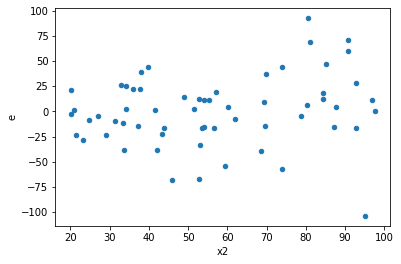

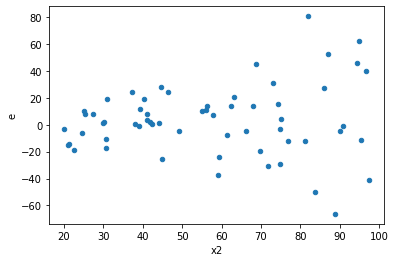

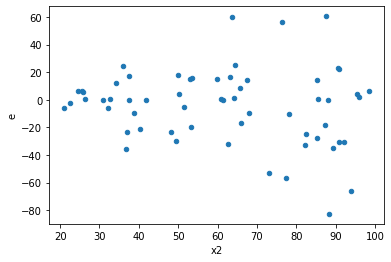

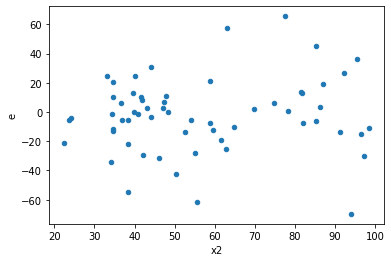

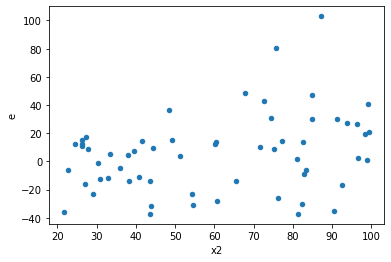

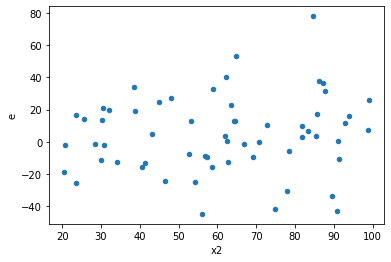

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,33.0,19.0,25144.26984123417,19016.068924683597,761.94757094649,1000.845732878084,1.3135362209171888,0.53698653209055,0.731506733954725,0.268493266045275,Reject001=1 : Homoscedasticity
3.0,24.0,28.0,8841.873128902393,25848.81801096187,368.41138037093305,923.1720718200668,2.5058185523220695,0.020870090766864413,0.9895649546165678,0.010435045383432207,Reject001=1 : Homoscedasticity
6.0,18.0,34.0,6964.54899656591,27796.084810318207,386.9193886981061,817.5319061858296,2.112925663758114,0.05884758816098312,0.9705762059195084,0.02942379408049156,Reject001=1 : Homoscedasticity
11.0,16.0,36.0,5453.948991302388,41497.142347425965,340.87181195639926,1152.69839853961,3.381618421082736,0.002372039973045581,0.9988139800134772,0.0011860199865227905,Reject001=0 : Heteroscedasticity
14.0,27.0,25.0,16941.14303706972,20949.196452156113,627.4497421136933,837.9678580862445,1.3355139094700679,0.47007143215432223,0.7649642839228389,0.23503571607716112,Reject001=1 : Homoscedasticity
21.0,21.0,31.0,17512.00812685128,27093.197588389587,833.90514889768,873.9741157545028,1.0480497894871965,0.8869137796612299,0.5565431101693851,0.44345688983061493,Reject001=1 : Homoscedasticity
23.0,29.0,23.0,11158.752893504858,24009.06878297897,384.78458253465027,1043.8725557816945,2.712875211645707,0.016572187476041167,0.9917139062619794,0.008286093738020583,Reject001=1 : Homoscedasticity
24.0,16.0,36.0,5817.984732909497,25238.57548276094,363.6240458068436,701.071541187804,1.928012047806684,0.10153411377020816,0.9492329431148959,0.05076705688510408,Reject001=1 : Homoscedasticity
25.0,24.0,28.0,8446.175274690231,26933.56646742804,351.9239697787596,961.91308812243,2.733298015270588,0.011656675224350987,0.9941716623878245,0.005828337612175494,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,33.0,19.0,25144.26984123417,19016.068924683597,761.94757094649,1000.845732878084,1.3135362209171888,0.53698653209055,Reject001=1 : Homoscedasticity
1.0,33.0,19.0,23314.17798280064,9554.570373960054,706.4902419030497,502.872124945266,0.7117892012077843,0.38206873505258826,Reject001=1 : Homoscedasticity
2.0,25.0,27.0,12444.404184197483,11421.217849739474,497.77616736789935,423.0080685088694,0.8497957440301278,0.6854990563146236,Reject001=1 : Homoscedasticity
3.0,24.0,28.0,8841.873128902393,25848.81801096187,368.41138037093305,923.1720718200668,2.5058185523220695,0.020870090766864413,Reject001=1 : Homoscedasticity
4.0,24.0,28.0,36774.648986004766,24955.405359638797,1532.277041083532,891.2644771299571,0.5816601392785404,0.18128569403198083,Reject001=1 : Homoscedasticity
5.0,20.0,32.0,26053.95490195545,10681.03071827558,1302.6977450977724,333.7822099461119,0.256223833350583,0.002240419842306666,Reject001=0 : Heteroscedasticity
6.0,18.0,34.0,6964.54899656591,27796.084810318207,386.9193886981061,817.5319061858296,2.112925663758114,0.05884758816098312,Reject001=1 : Homoscedasticity
7.0,29.0,23.0,25411.250869799223,8542.274750829396,876.2500299930766,371.4032500360607,0.4238553350337634,0.02992169598817821,Reject001=1 : Homoscedasticity
8.0,26.0,26.0,29407.265961998433,8215.248003813103,1131.0486908460937,315.97107706973475,0.2793611624565597,0.001802330946305095,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      868
Reject001=0 : Heteroscedasticity    132
Name: Result_test, dtype: int64